In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [6]:
credit = pd.read_csv("C:/Users/GC/creditcard.csv")

In [7]:
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
# 피쳐 선택
X_data = credit.iloc[:, 1:-1]
y_data = credit.iloc[:, -1]

# 표준화
scaler = StandardScaler()
scaler.fit(X_data)
X_train = scaler.transform(X_data)

# ====== 2) 오토 인코더 모델 학습 및 예측 ======
X_train_AE = X_train.copy()

# 파라미터 설정
n_input = X_train_AE.shape[1]
n_output = n_input

In [9]:
# 모델 레이어 설정
x_Input = Input(batch_shape=(None, n_input))
x_Encoder1 = Dense(256, activation='relu')(x_Input)
x_Encoder1 = Dropout(0.3)(x_Encoder1)
x_Encoder2 = Dense(512, activation='relu')(x_Encoder1)
x_Encoder2 = Dropout(0.2)(x_Encoder2)
y_Decoder1 = Dense(256, activation='relu')(x_Encoder2)
y_Decoder1 = Dropout(0.3)(y_Decoder1)
y_Decoder2 = Dense(n_output, activation='linear')(y_Decoder1)

In [10]:
# 모델 구조 설정
model = Model(x_Input, y_Decoder2)
model.compile(loss='mse', optimizer=Adam(lr=0.001))
print("====== 모델 전체 구조 ======")
print(model.summary())

# 모델 파라미터 및 조기 종료 조건
EPOCHS = int(input('학습 횟수 설정: '))
BATCH = int(input('배치 사이즈 설정: '))
es = EarlyStopping(monitor='loss', patience=5, verbose=1)


====== 모델 전체 구조 ======
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 256)               7680      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 25

In [11]:
# 모델 훈련
hist = model.fit(X_train_AE, X_train_AE, 
                 epochs=EPOCHS,
                 batch_size=BATCH,
                 callbacks=[es],
                 shuffle=True)

Epoch 1/10
557/557 [==============================] - 9s 15ms/step - loss: 0.2441
Epoch 2/10
557/557 [==============================] - 8s 15ms/step - loss: 0.1654
Epoch 3/10
557/557 [==============================] - 8s 15ms/step - loss: 0.1491
Epoch 4/10
557/557 [==============================] - 8s 15ms/step - loss: 0.1396
Epoch 5/10
557/557 [==============================] - 8s 15ms/step - loss: 0.1374
Epoch 6/10
557/557 [==============================] - 9s 15ms/step - loss: 0.1328
Epoch 7/10
557/557 [==============================] - 8s 15ms/step - loss: 0.1274
Epoch 8/10
557/557 [==============================] - 8s 14ms/step - loss: 0.1247
Epoch 9/10
557/557 [==============================] - 8s 14ms/step - loss: 0.1232
Epoch 10/10
557/557 [==============================] - 8s 14ms/step - loss: 0.1238


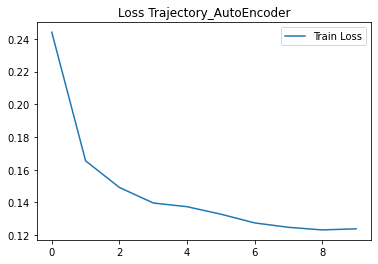

In [13]:
# loss 그래프
plt.plot(hist.history['loss'], label='Train Loss')
plt.title('Loss Trajectory_AutoEncoder')
plt.legend()
plt.show()

In [14]:
# 예측
y_pred_AE = model.predict(X_train_AE)

8901/8901 [==============================] - 10s 1ms/step


In [15]:
# 거리 계산
def calc_distance(origin, pred):
    dist = []
    for i in range(len(pred)):
        dist.append(np.sqrt(np.sum(np.square(origin[i]-pred[i]))))
    return pd.Series(dist)


In [16]:
distance_AE = calc_distance(X_train_AE, y_pred_AE)

In [17]:
credit['distance_AE'] = distance_AE # 원래 데이터에 넣기

In [31]:
from sklearn.ensemble import IsolationForest

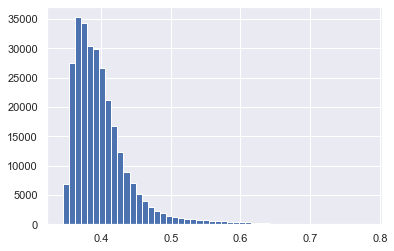

In [34]:
# ====== 3) IsolationForest 모델 학습 및 예측 ======
X_train_IF = X_train.copy()

model2 = IsolationForest(n_estimators=200, verbose=1)
model2.fit(X_train_IF)
score = abs(model2.score_samples(X_train_IF)) # 이상치 점수

plt.hist(score, bins=50) # 이상치 점수 시각화
plt.show()

y_pred_IF = (score > 0.7).astype(int) # 이상치 점수 기준: 0.7

credit['Class_iForest'] = pd.Series(y_pred_IF) # 원래 데이터에 넣기

In [35]:
# ====== 4) 결과 비교 ======
df = credit.sort_values(by='distance_AE', ascending=False) # 거리 순 정렬

print(df['Class'].value_counts()) # original label 이상치
print(df['Class_iForest'].value_counts()) # iForest label 이상치


0    284315
1       492
Name: Class, dtype: int64
0    284654
1       153
Name: Class_iForest, dtype: int64


In [36]:
# AE로 계산한 거리 상위 n개 중 이상치 몇 개 있는지 반환
def count_abnormal(data, threshold, num=30):
    for i in range(threshold//num):
        print(f"<< 상위 {(i+1)*num}개에서 이상치 체크 >> ")
        print("  ====== AutoEncoder vs. Original Label ======")
        print(data['Class'][:(i+1)*num].value_counts())        
        print("  ====== AutoEncoder vs. iForest Label ======")
        print(data['Class_iForest'][:(i+1)*num].value_counts())
        print(" ")

# 상위 600개 데이터에서 비교
count_abnormal(df, 600)

<< 상위 30개에서 이상치 체크 >> 
  ====== AutoEncoder vs. Original Label ======
0    25
1     5
Name: Class, dtype: int64
  ====== AutoEncoder vs. iForest Label ======
1    30
Name: Class_iForest, dtype: int64
 
<< 상위 60개에서 이상치 체크 >> 
  ====== AutoEncoder vs. Original Label ======
0    50
1    10
Name: Class, dtype: int64
  ====== AutoEncoder vs. iForest Label ======
1    55
0     5
Name: Class_iForest, dtype: int64
 
<< 상위 90개에서 이상치 체크 >> 
  ====== AutoEncoder vs. Original Label ======
0    73
1    17
Name: Class, dtype: int64
  ====== AutoEncoder vs. iForest Label ======
1    69
0    21
Name: Class_iForest, dtype: int64
 
<< 상위 120개에서 이상치 체크 >> 
  ====== AutoEncoder vs. Original Label ======
0    96
1    24
Name: Class, dtype: int64
  ====== AutoEncoder vs. iForest Label ======
1    79
0    41
Name: Class_iForest, dtype: int64
 
<< 상위 150개에서 이상치 체크 >> 
  ====== AutoEncoder vs. Original Label ======
0    118
1     32
Name: Class, dtype: int64
  ====== AutoEncoder vs. iForest Label ======
1    8

# 코사인 유사도와 재현율을 사용헌 문제풀이

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#EPOCHES = 300
EPOCHES = 10

df = pd.read_csv("C:/Users/GC/creditcard.csv")
df.shape

dataX=df.iloc[:,1:-1]
dataX = (dataX- dataX.mean()) / dataX.std()
dt=np.array(dataX).astype(np.float32)

nFeature=dt.shape[1]
inputX = Input(batch_shape=(None,nFeature))
Xencode = Dense(12, activation='relu')(inputX)
Xdecode = Dense(nFeature, activation='linear')(Xencode)
model = Model(inputX, Xdecode)
model.compile(loss='mse', optimizer=Adam(lr=0.001))
h = model.fit(dt,dt,epochs=EPOCHES, batch_size=1000, shuffle=True)
yhat=model.predict(dt)

dist_list=[]
for i in range(len(yhat)):
    dist = cosine_similarity([dt[i]],[yhat[i]])
    dist_list.append(dist)

dist_list2 = dist_list.copy()
maxN=492
max_dict={}
for i in range(maxN):
    max_index = dist_list2.index(max(dist_list2))
    max_value = dist_list2.pop(max_index)
    dist_list2.insert(max_index,0)
    max_dict[max_index]=max_value

actual =set(df[df['Class']==1].index)
predicted = set(max_dict.keys())
print('실제로 비정상인 데이터 수:',len(actual))
print('실제 비정상인데 비정상으로 예측한 데이터 수:',len(actual.intersection(predicted)))
print('precision={}'.format(len(actual.intersection(predicted))/len(actual)))


Epoch 1/10
285/285 [==============================] - 1s 1ms/step - loss: 0.9320
Epoch 2/10
285/285 [==============================] - 0s 1ms/step - loss: 0.6793
Epoch 3/10
285/285 [==============================] - 0s 1ms/step - loss: 0.6150
Epoch 4/10
285/285 [==============================] - 0s 1ms/step - loss: 0.5890
Epoch 5/10
285/285 [==============================] - 0s 1ms/step - loss: 0.5724
Epoch 6/10
285/285 [==============================] - 0s 1ms/step - loss: 0.5629
Epoch 7/10
285/285 [==============================] - 0s 1ms/step - loss: 0.5587
Epoch 8/10
285/285 [==============================] - 0s 1ms/step - loss: 0.5569
Epoch 9/10
285/285 [==============================] - 0s 1ms/step - loss: 0.5560
Epoch 10/10
8901/8901 [==============================] - 6s 648us/step
실제로 비정상인 데이터 수: 492
실제 비정상인데 비정상으로 예측한 데이터 수: 6
precision=0.012195121951219513
